In [1]:
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [62]:
color_map = dict(zip(['Z', 'R', 'O', 'Y', 'G', 'C', 'B', 'V', 'S', 'K'],
                     ['black', 'red', 'orange', 'yellow', 'springgreen', 'cyan', 'blue', 'violet', 'lime', 'darkorange']))

@np.vectorize
def convert(c):
    return color_map[c]

In [54]:
def read(file, reverse=False, zero=True, maxes=True):
    data = pd.read_csv(file, sep=' ', comment='#', header=None)
    if reverse: data = data.reindex(index=data.index[::-1]); data = data.reset_index(drop=True)
    data[1] += data[2]/60
   # print(data[0])
    if maxes:
        data[2] = data[0].apply(lambda t: t[1])
    else:
        del data[2]
    data[0] = data[0].apply(lambda t: t[0])
    
    if zero:
        data[1] -= data[1][0]
        data = data.drop(index=0)
    return data

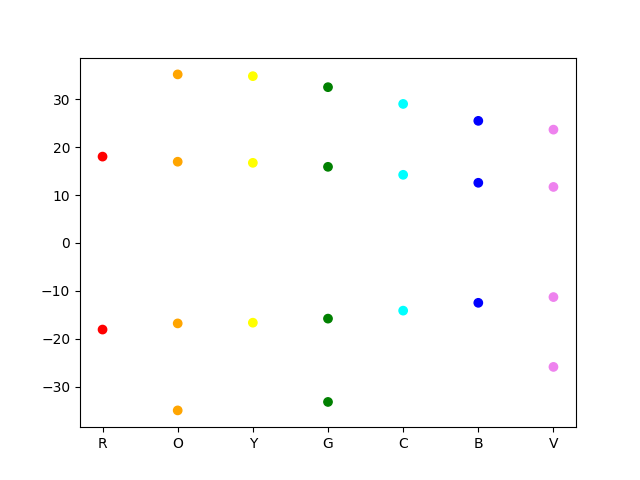

In [46]:
data = read('HG.txt')
data2 = read('HG_2.txt', reverse=True)
%matplotlib widget
plt.scatter(data[0], data[1], c=convert(data[0]))
plt.show()

    0          1  2
1   R  18.166667  2
2   O  16.766667  2
3   Y  16.716667  2
4   G  15.800000  1
5   C  14.166667  1
6   B  12.500000  1
7   V  11.666667  1
8   O  35.616667  2
9   Y  35.416667  2
10  G  33.250000  2
11  C  29.583333  2
12  B  25.733333  2
13  V  23.750000  2
14  O -35.333333  2
15  Y -35.166667  2
16  G -33.016667  2
17  C -29.500000  2
18  B -25.900000  2
19  V -23.933333  2
20  R -18.066667  1
21  O -16.933333  1
22  Y -16.766667  1
23  G -15.950000  1
24  C -14.116667  1
25  B -12.633333  1
26  V -11.650000  1


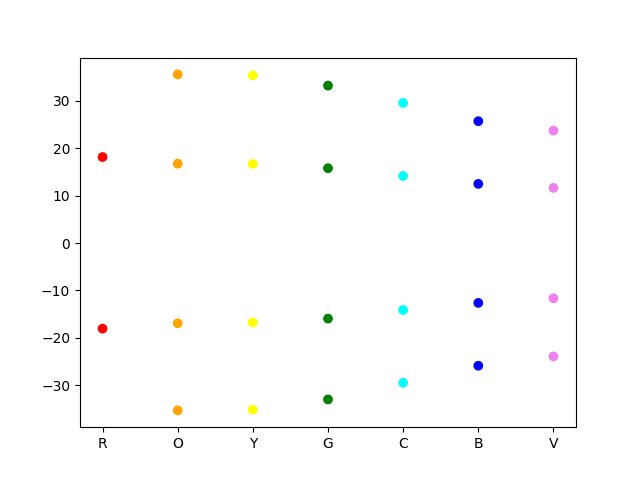

In [45]:
%matplotlib widget
plt.scatter(data2[0], data2[1], c=convert(data2[0]))
print(data2)
plt.show()

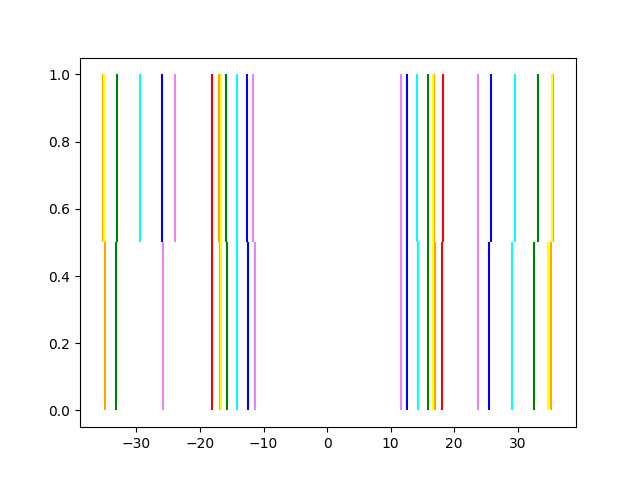

In [43]:
data1 = read('HG.txt')

%matplotlib widget
plt.vlines(data1[1], 0, 0.5, colors=convert(data1[0]))
plt.vlines(data2[1], 0.5, 1, colors=convert(data2[0]))
#plt.scatter(data2[1], np.zeros(len(data2[1])), c=convert(data2[0]), s=3)
#plt.scatter(data1[1], np.ones(len(data1[1])), c=convert(data1[0]), s=3)
plt.show()

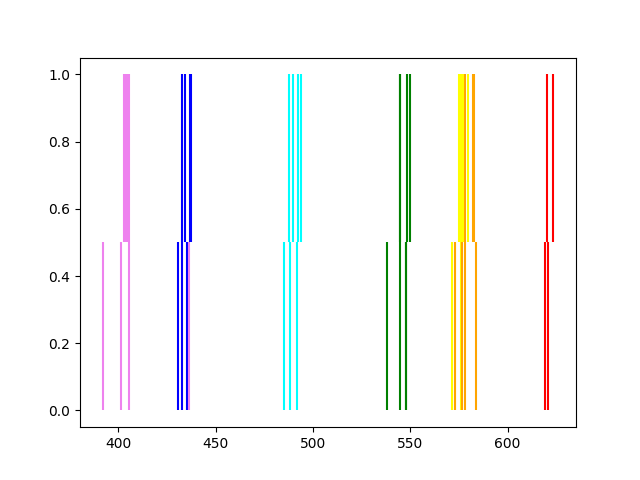

In [47]:

%matplotlib widget
d1 = np.round(np.sin(np.radians(np.abs(data[1])))*(1e-3/500)/np.array(data[2],dtype=float)/1e-9, 2)
plt.vlines(d1, 0, 0.5, colors=convert(data1[0]))
d1 = np.round(np.sin(np.radians(np.abs(data2[1])))*(1e-3/500)/np.array(data2[2],dtype=float)/1e-9, 2)
plt.vlines(d1, 0.5, 1.0, colors=convert(data2[0]))

In [55]:
read('HG_PR.txt', zero=False, maxes=False)

,0,1
0,R,211.166667
1,O,210.633333
2,G,210.366667
3,C,209.716667
4,B,208.733333
5,V,207.683333
6,R,370.166667
7,Y,307.400000
8,G,307.866667
9,C,308.600000


In [56]:
data3 = read('Na.txt', reverse=True)

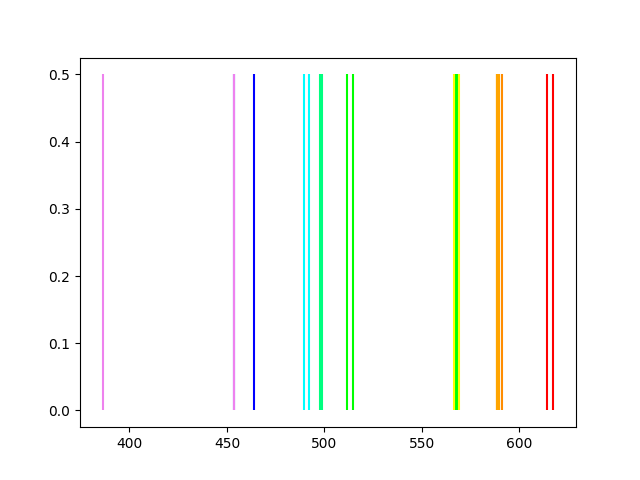

In [63]:

%matplotlib widget
d3 = np.round(np.sin(np.radians(np.abs(data3[1])))*(1e-3/500)/np.array(data3[2],dtype=float)/1e-9, 2)
plt.vlines(d3, 0, 0.5, colors=convert(data3[0]))